In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\emmau\AppData\Local\Temp\pip-install-yt04aae6\tensorflow-gpu_82c6a4b88373492bbbd0851b98fca686\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautif

In [7]:
!pip install keras

In [80]:
import tensorflow as tf
import os
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt

In [74]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [75]:
tf.config.list_physical_devices('GPU')

[]

In [81]:
train_happy = os.path.join('./data/train/train_happy')
train_sad = os.path.join('./data/train/train_sad')
val_happy = os.path.join('./data/val/val_happy')
val_sad = os.path.join('./data/val/val_sad')

In [82]:
train_happy_names = os.listdir(train_happy)
print(f'TRAIN SET HAPPY FACES: {train_happy_names[:10]}')

train_sad_names = os.listdir(train_sad)
print(f'TRAIN SET SAD FACES: {train_sad_names[:10]}')

val_happy_names = os.listdir(val_happy)
print(f'VAL SET HAPPY FACES: {val_happy_names[:10]}')

val_sad_names = os.listdir(val_sad)
print(f'VAL SET SAD FACES: {val_sad_names[:10]}')

TRAIN SET HAPPY FACES: ['anastasia-vityukova-9euorpmZbbk-unsplash.jpg', 'autumn-goodman-vTL_qy03D1I-unsplash.jpg', 'babi-akpZ94lE0ZM-unsplash.jpg', 'baptista-ime-james-ikysd1YGmU8-unsplash.jpg', 'baylee-gramling-RnHhR_sip7M-unsplash.jpg', 'ben-o-bro-C5XyLljkMrY-unsplash.jpg', 'ben-white-4K2lIP0zc_k-unsplash.jpg', 'benigno-hoyuela-72zsd_fnxYc-unsplash.jpg', 'bishka-nguyen-nJF42yBkQzg-unsplash.jpg', 'blake-cheek-6v11noBZVuo-unsplash.jpg']
TRAIN SET SAD FACES: ['addy-mae-QSs2VBWGYHA-unsplash.jpg', 'alex-sheldon-eIEuGshdTM4-unsplash.jpg', 'amin-moshrefi-twfoxW0hkwg-unsplash.jpg', 'ammi-alba-aJZDfsGfqw8-unsplash.jpg', 'asher-legg-JhWvFdT0qxg-unsplash.jpg', 'babi-NW61v3xF0-0-unsplash.jpg', 'blake-harbison-okSwAo-Vvhc-unsplash.jpg', 'brut-carniollus-jGEsapFCLgw-unsplash.jpg', 'charlesdeluvio-5R5HgLyHMVQ-unsplash.jpg', 'charlesdeluvio-K4mSJ7kc0As-unsplash.jpg']
VAL SET HAPPY FACES: ['nathan-dumlao-26rK1-bH9Ls-unsplash.jpg', 'olivier-rule-RKqIIjqWRak-unsplash.jpg', 'omar-lopez-fFDlC1OleWY-unspl

In [83]:
print(f'total training happy faces images: {len(os.listdir(train_happy))}')
print(f'total training sad faces images: {len(os.listdir(train_sad))}')
print(f'total validation happy faces images: {len(os.listdir(val_happy))}')
print(f'total validation sad faces images: {len(os.listdir(val_sad))}')

total training happy faces images: 40
total training sad faces images: 40
total validation happy faces images: 13
total validation sad faces images: 13


In [84]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

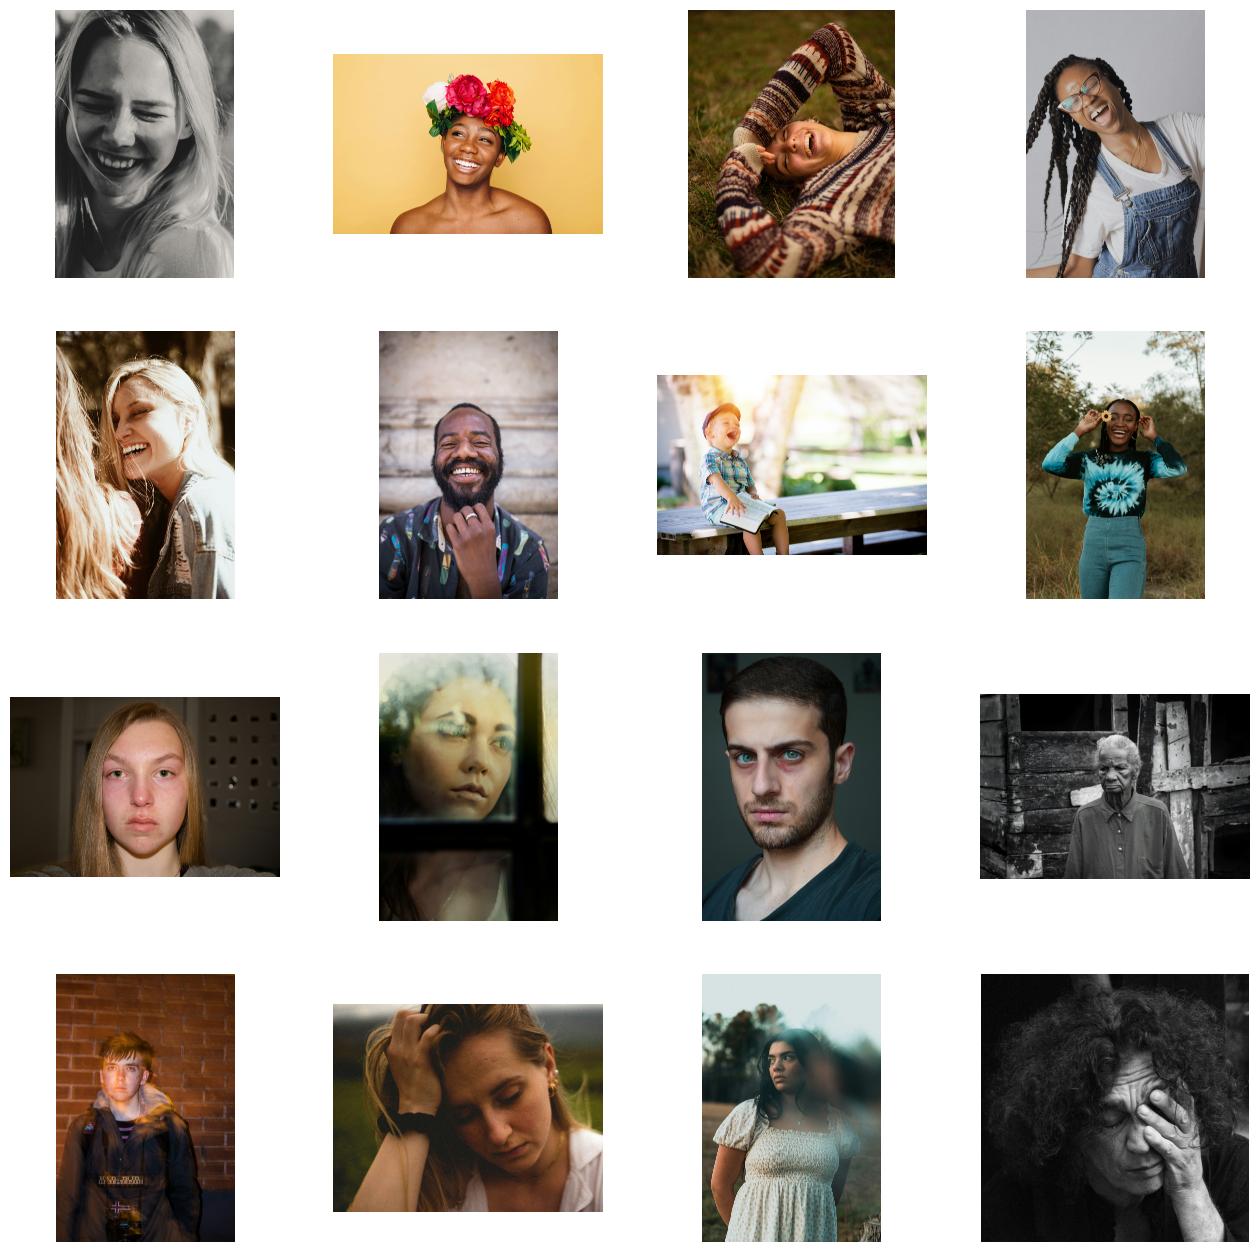

In [85]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [102]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 149, 149, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 35, 35, 64)       

### DATA PREPROCESSING

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './data/train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=120,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './data/val',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=60,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 80 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


### Model Training

In [106]:
history = model.fit(
      train_generator,
      steps_per_epoch=2,  
      epochs=8,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=2)

### Prediction

In [53]:
#loading data
data = tf.keras.utils.image_dataset_from_directory('data')

Found 120 files belonging to 3 classes.


In [54]:
data_iterator = data.as_numpy_iterator()

In [55]:
batch = data_iterator.next()

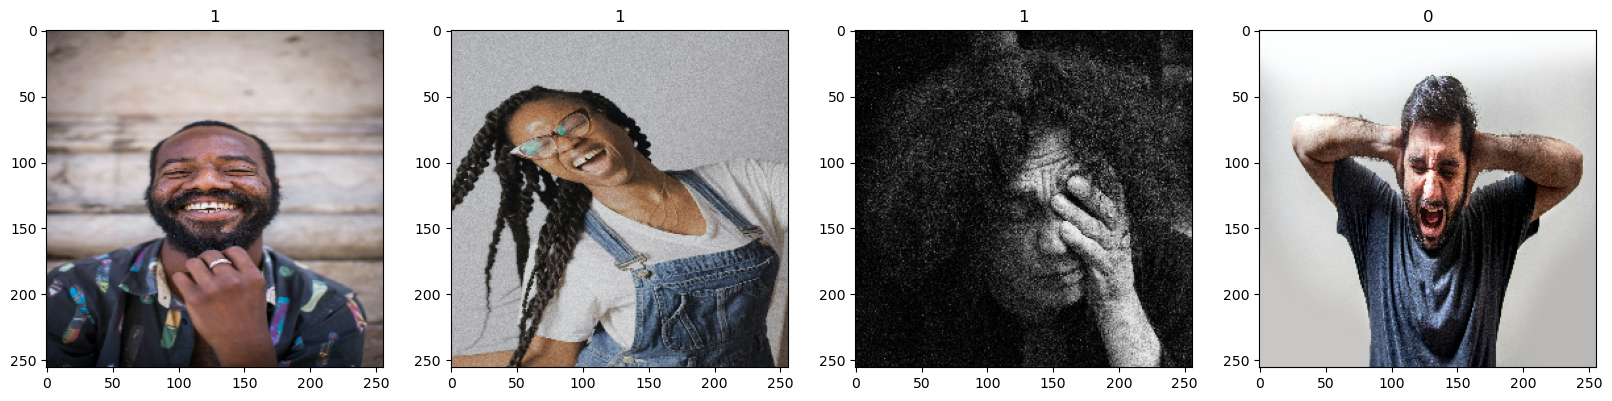

In [56]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [57]:
data = data.map(lambda x,y: (x/255, y))

In [58]:
data.as_numpy_iterator().next()

(array([[[[2.96078444e-01, 3.15686285e-01, 1.98039219e-01],
          [2.94117659e-01, 3.13725501e-01, 1.96078435e-01],
          [2.98039228e-01, 3.38235289e-01, 2.04901963e-01],
          ...,
          [3.95098031e-01, 4.16666657e-01, 2.72549033e-01],
          [3.93137246e-01, 4.16666657e-01, 2.75490195e-01],
          [3.82352948e-01, 4.05882359e-01, 2.64705896e-01]],
 
         [[3.01960796e-01, 3.21568638e-01, 2.01960787e-01],
          [2.99019605e-01, 3.22549015e-01, 1.83333337e-01],
          [3.15686285e-01, 3.31372559e-01, 1.96078435e-01],
          ...,
          [3.92156869e-01, 4.07843143e-01, 2.62745112e-01],
          [3.88235301e-01, 4.17647064e-01, 2.54901975e-01],
          [3.84313732e-01, 4.11764711e-01, 2.64705896e-01]],
 
         [[3.05882365e-01, 3.21568638e-01, 2.29411766e-01],
          [3.00980389e-01, 3.18627447e-01, 2.06862748e-01],
          [2.94117659e-01, 3.29411775e-01, 2.11764708e-01],
          ...,
          [4.03921574e-01, 4.19607848e-01, 2.7450

In [30]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [31]:
val_size

0

In [33]:
test_size

0

In [32]:
train_size

2

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [36]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### Data Processing

In [63]:
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'data/train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=80,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'data/val',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=26,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


### Training

In [64]:
logdir='logs'

In [65]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
history = model.fit(
      train,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = val,
      validation_steps=8)

Epoch 1/15


8/8 [==============================] - 28s 325ms/step - loss: 0.8342 - accuracy: 0.5312


### Model Performance

KeyError: 'val_loss'

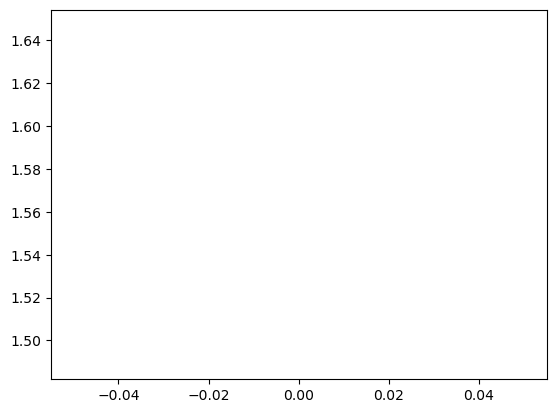

In [43]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

KeyError: 'val_accuracy'

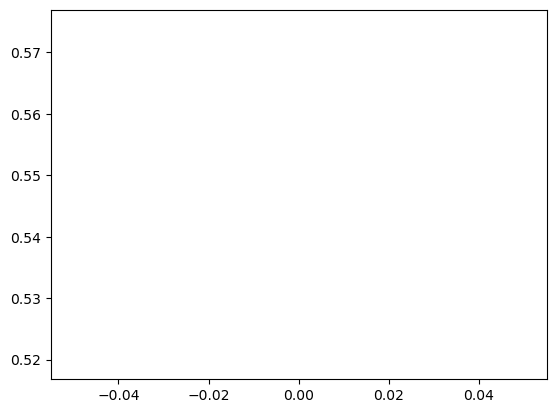

In [44]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()